Переменные:
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)

In [1]:
import pandas as pd
import numpy as np

In [3]:
df_sac = pd.read_csv('student-mat.csv', sep = ',')

In [13]:
df_sac.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df_sac.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
df_sac.shape

(395, 33)

In [15]:
df_sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [18]:
df_sac['age'].unique() #В Португалии разрешено распитие алкоголя с 18 лет.

array([18, 17, 15, 16, 19, 22, 20, 21])

In [137]:
df_sac[['sex','age','Pstatus']]

,sex,age,Pstatus
0,F,18,A
1,F,17,T
2,F,15,T
3,F,15,T
4,F,16,T
...,...,...,...
390,M,20,A
391,M,17,T
392,M,21,T
393,M,18,T


In [20]:
df_sac.iloc[118]

school            GP
sex                M
age               17
address            R
famsize          GT3
Pstatus            T
Medu               1
Fedu               3
Mjob           other
Fjob           other
reason        course
guardian      father
traveltime         3
studytime          2
failures           1
schoolsup         no
famsup           yes
paid              no
activities       yes
nursery          yes
higher           yes
internet         yes
romantic          no
famrel             5
freetime           2
goout              4
Dalc               1
Walc               4
health             5
absences          20
G1                 9
G2                 7
G3                 8
Name: 118, dtype: object

In [52]:
df_sac[df_sac['age'] >=18]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
150,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,6,5,0
153,GP,M,19,U,GT3,T,3,2,services,at_home,...,4,5,4,1,1,4,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [91]:
hooligans = df_sac[df_sac['age'] <18] #из 395 школьников 284 несовершеннолетних пьют алкоголь 72% 

In [92]:
hooligans #из 395 школьников 284 несовершеннолетних пьют алкоголь 72% 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,MS,F,17,U,GT3,T,2,2,other,at_home,...,3,4,3,1,1,3,8,13,11,11
373,MS,F,17,R,GT3,T,1,2,other,other,...,3,5,5,1,3,1,14,6,5,5
379,MS,F,17,R,GT3,T,3,1,at_home,other,...,4,5,4,2,3,1,17,10,10,10
382,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,2,11,11,10


In [70]:
df_sac[(df_sac['age'] <18) & (df_sac['address'] =='R')].shape #несовершеннолетние живут в пригороде

(53, 33)

In [72]:
df_sac[(df_sac['age'] <18) & (df_sac['address'] =='U')] #несовершеннолетние живут в городе

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11
363,MS,F,17,U,LE3,T,4,4,at_home,at_home,...,2,3,4,1,1,1,0,16,15,15
372,MS,F,17,U,GT3,T,2,2,other,at_home,...,3,4,3,1,1,3,8,13,11,11
382,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,2,11,11,10


In [28]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import missingno as msno
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
age = df_sac['age']

In [38]:
age

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64

<AxesSubplot:title={'center':'age'}>

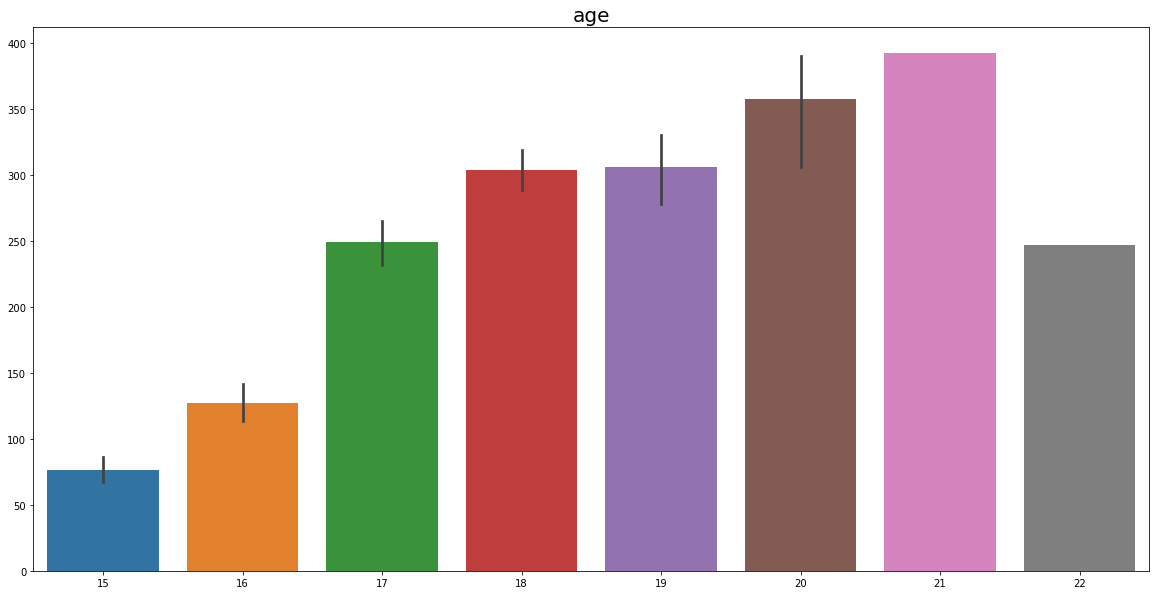

In [44]:
plt.figure(figsize = (20,10))
plt.title('age', fontsize = 20)
sns.barplot(y = age.index, x = age.values, alpha = 1)

In [89]:
df_sac['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [87]:
sex_sac = df_sac['sex'].value_counts()

<AxesSubplot:ylabel='sex'>

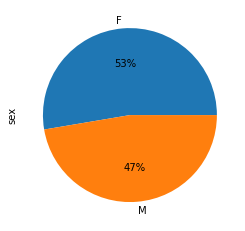

In [90]:
sex_sac.plot.pie(autopct = '%2.0f%%')

In [114]:
df_sac['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [115]:
df_sac[(df_sac['Pstatus'] == 'A') & (df_sac['age'] <18)].shape 
# у 75% разведенных семей пьют дети до совершеннолетия

(31, 33)

In [116]:
df_sac['age'].sum() / len(df_sac['age'])

16.696202531645568

In [118]:
df_sac['age'].mean()

16.696202531645568

In [121]:
df_sac['age'].sort_values().reset_index(drop=True)

0      15
1      15
2      15
3      15
4      15
       ..
390    20
391    20
392    20
393    21
394    22
Name: age, Length: 395, dtype: int64

In [123]:
df_sac['age'].median()

17.0

In [125]:
df_sac['age'].mode()

0    16
Name: age, dtype: int64

<AxesSubplot:>

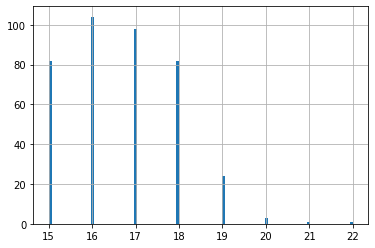

In [126]:
df_sac['age'].hist(bins=100)

In [136]:
df_sac.groupby('Dalc')['age'].mean()

Dalc
1    16.615942
2    16.706667
3    17.115385
4    17.333333
5    17.222222
Name: age, dtype: float64

In [140]:
df_sac.groupby('Fjob')['freetime'].mean() #freetime of student  - P job

Fjob
at_home     3.550000
health      2.944444
other       3.271889
services    3.153153
teacher     3.241379
Name: freetime, dtype: float64

In [142]:
df_sac.pivot_table(index = 'age',
                   values = ['G3', 'Dalc'],
                   aggfunc = ['mean', 'median']) #кол-во дней распития алкоголя не влияет на конечную оценку студента

mean            median    
         Dalc         G3   Dalc  G3
age                                
15   1.353659  11.256098      1  11
16   1.432692  11.028846      1  11
17   1.520408  10.275510      1  11
18   1.548780   9.548780      1  10
19   1.458333   8.208333      1   9
20   2.000000  14.000000      1  15
21   3.000000   7.000000      3   7
22   5.000000   8.000000      5   8

In [149]:
df_sac['G3'].mean()

10.415189873417722

In [153]:
df_sac['Fjob'].unique()
        

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [154]:
df_sac['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)


Средняя, медианная успеваемости и мода

In [155]:
df_sac['G3'].mean()

10.415189873417722

In [156]:
df_sac['G3'].median()

11.0

In [157]:
df_sac['G3'].mode()

0    10
Name: G3, dtype: int64

In [161]:
upper_level = df_sac['age'].mean() + 3 * df_sac['age'].std()
lower_level = df_sac['age'].mean() - 3 * df_sac['age'].std()

In [162]:
upper_level

20.52433070546244

In [163]:
lower_level 

12.868074357828695

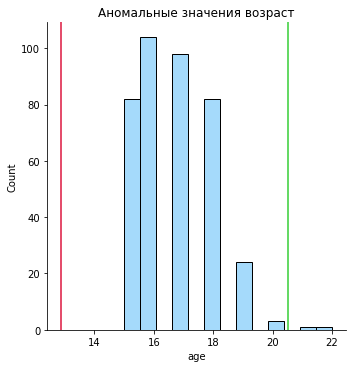

In [164]:
sns.displot(df_sac['age'], color = '#87CEFA')
plt.axvline(x = upper_level, color = '#32CD32', linestyle = '-')
plt.axvline(x = lower_level, color = '#DC143C', linestyle = '-')
plt.title('Аномальные значения возраст')
plt.show()